In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import gseapy as gp
import pickle

import decoupler as dc

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=100,dpi_save=300, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# eFig5e

In [3]:

sc.settings.figdir = "sfig5"


In [4]:
#adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11')
 
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_lesional11.h5ad'
adata=sc.read_h5ad(PATH)


In [5]:
adata_lesional_uncertain = adata[adata.obs["lvl3_annotation_pred"]=="UNCERTAIN_CELLTYPE"]

In [6]:
custom_colors = {    'F1: Superficial': '#ffef5a',
    'F2/3: Perivascular': '#364f99',
    'F2: Universal': '#91bae2',
    'F3: FRC-like': '#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: RAMP1+': '#4b2657',
     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
                               }

/tmp/ipykernel_19046/846338515.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_19046/846338515.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts_df['Category'], rotation=90, ha='center')  # Rotate x-ticks


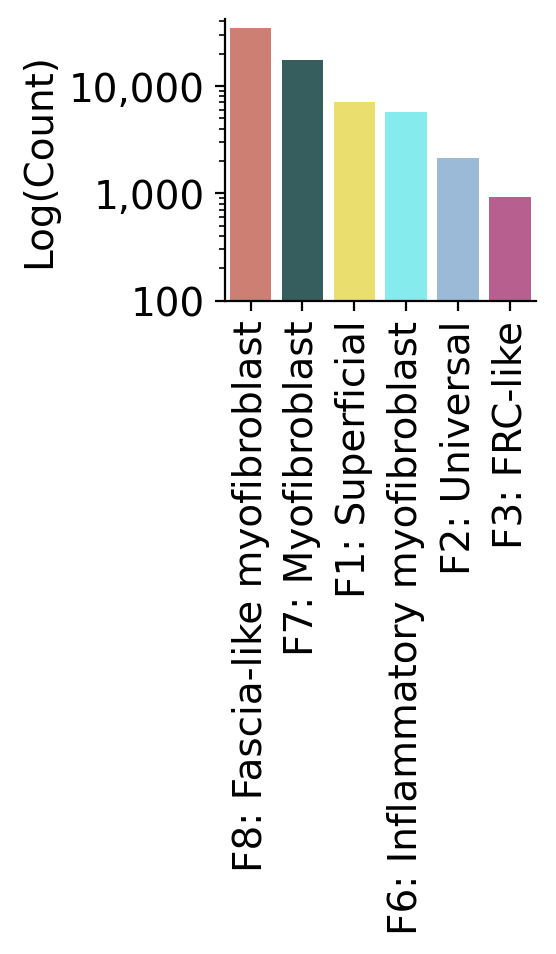

<Figure size 400x400 with 0 Axes>

In [7]:
value_counts = adata_lesional_uncertain.obs["test13"].value_counts()

value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Category', 'Count']
value_counts_df = value_counts_df.sort_values(by='Count', ascending=False)


value_counts_df = value_counts_df.iloc[:6]


value_counts_df['Color'] = value_counts_df['Category'].map(custom_colors)

# Create the bar plot
fig, ax = plt.subplots(figsize=(3, 5))   
sns.barplot(
    data=value_counts_df,
    x='Category',
    y='Count',
    palette=value_counts_df['Color'].tolist(),
    order=value_counts_df['Category'] 
)


ax.set_yscale('log')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.ylim(100, None)  # Set the minimum y-axis value to 100, leaving the maximum value unchanged

 
ax.grid(False)   

ax.set_xlabel("")   
ax.set_ylabel("Log(Count)")
ax.set_xticklabels(value_counts_df['Category'], rotation=90, ha='center')  # Rotate x-ticks

plt.tight_layout()

plt.show()
plt.savefig('sfig3/fig3_supp_uncertainpops.pdf')

In [8]:
import gc
del adata_lesional_uncertain
gc.collect()

1140

In [9]:
adata_lesional = adata[adata.obs.Site_status_binary=="Lesional"]


In [10]:
import pickle
pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)
#LESIONAL_GENES_VSHORT5   
    

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


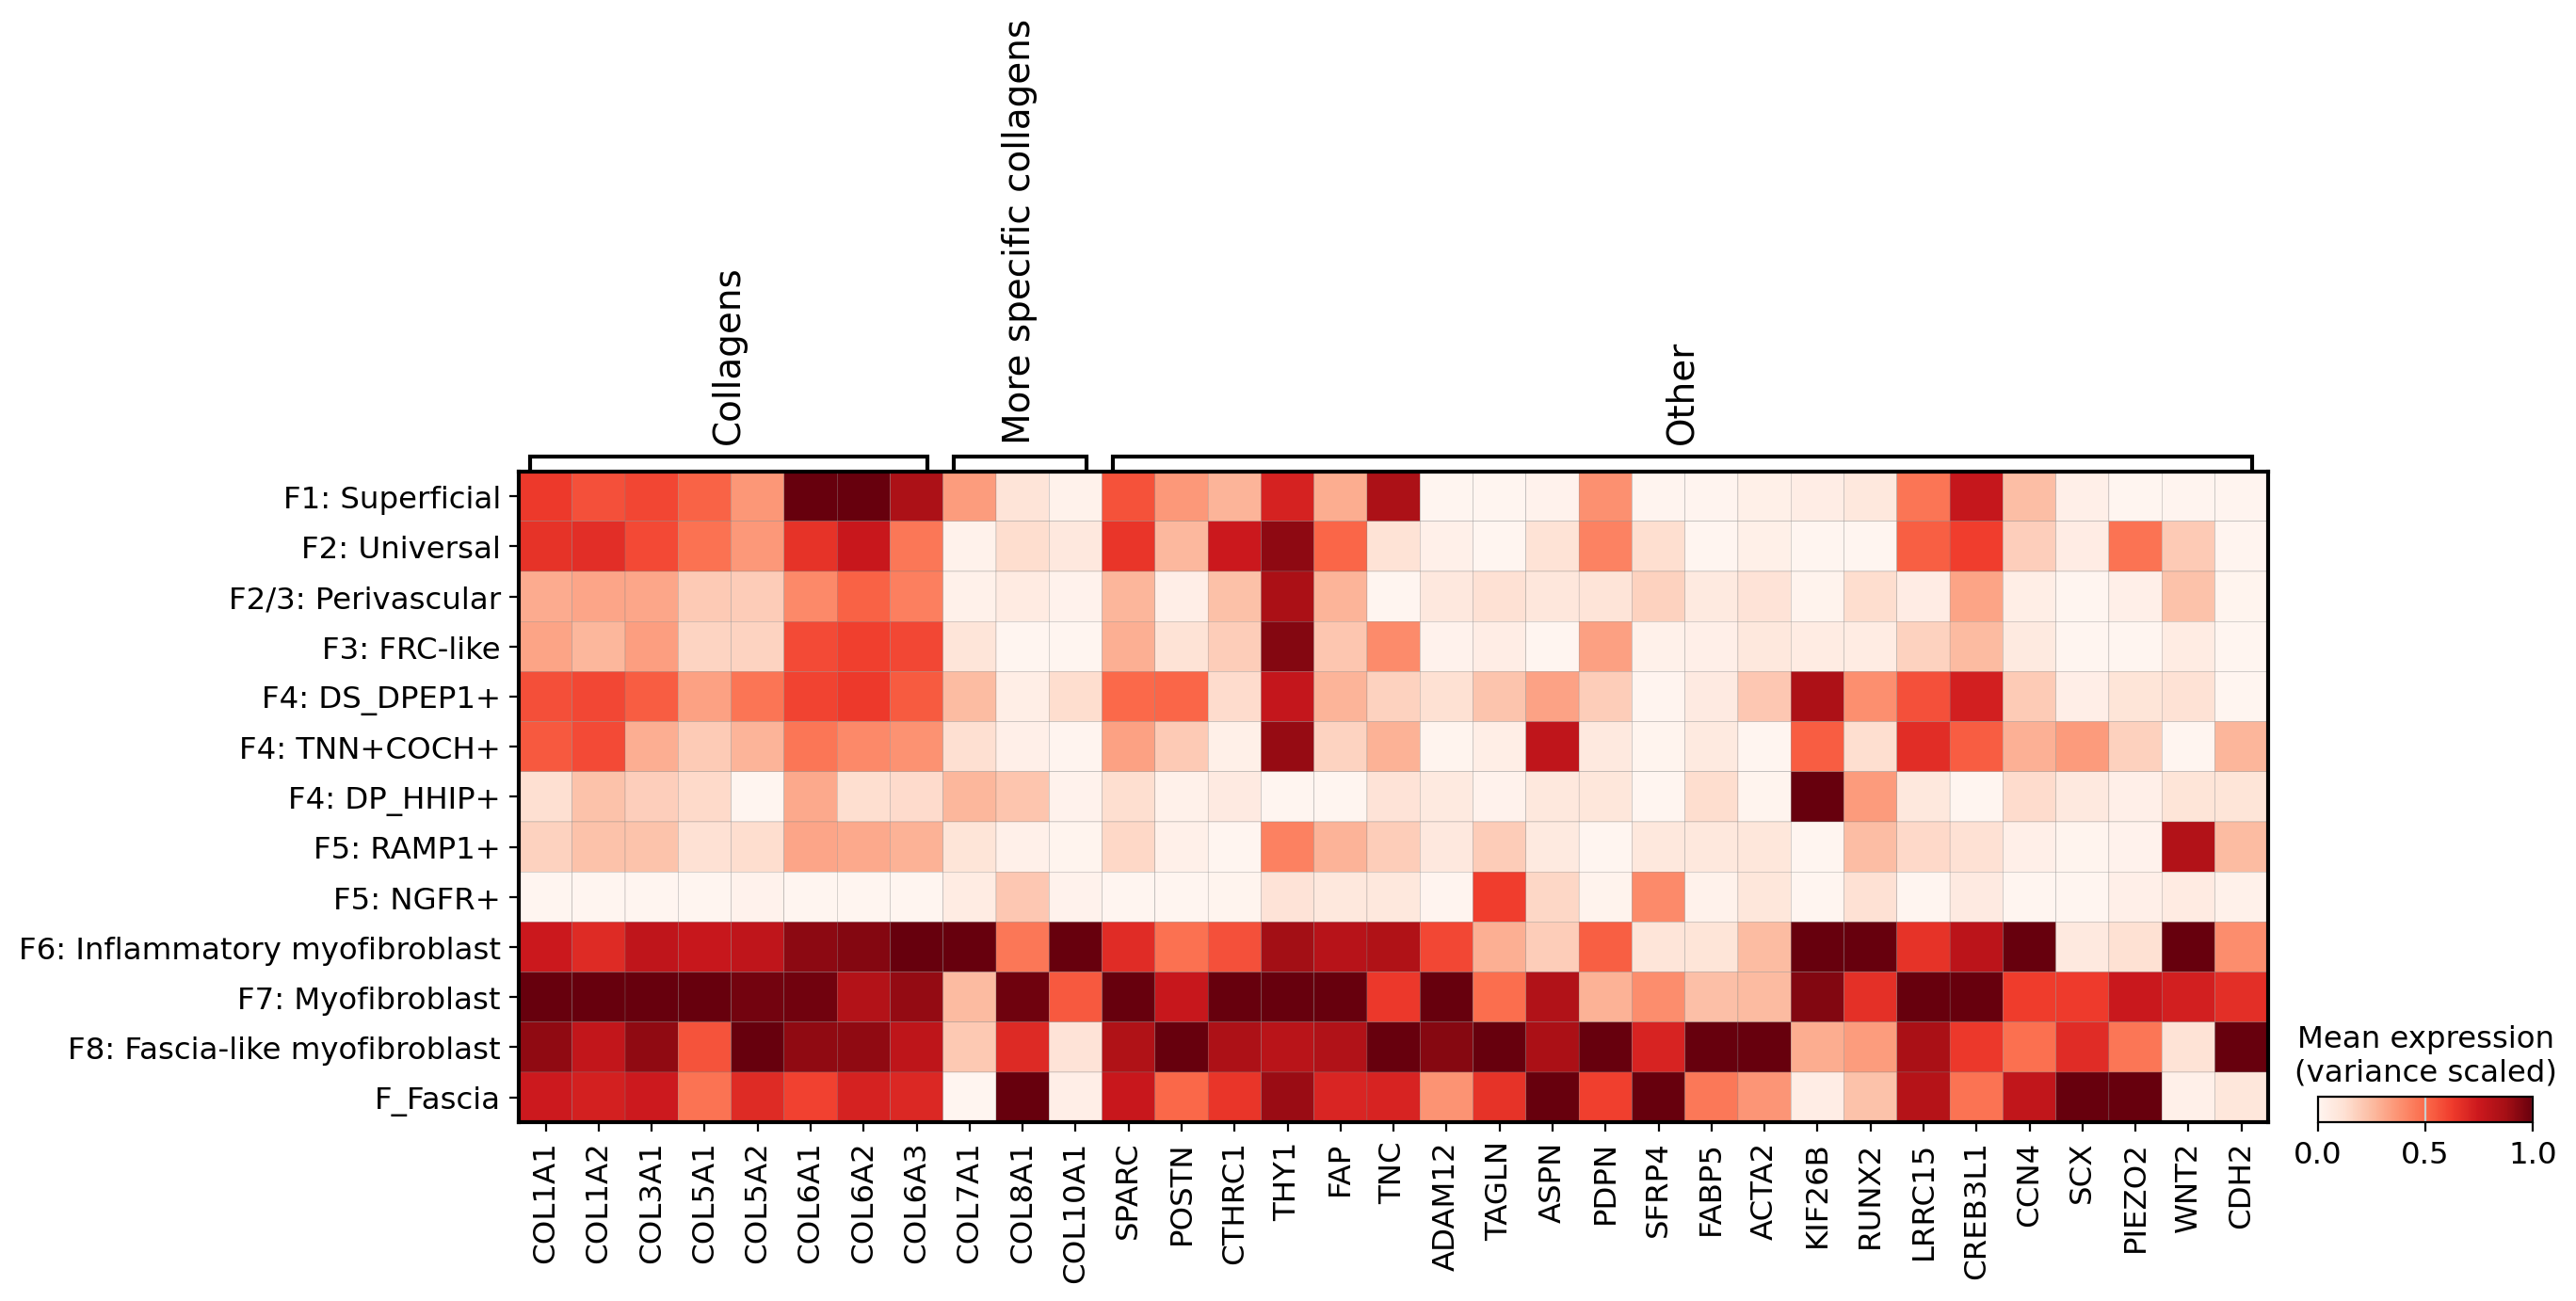

In [11]:
COLLAGENS_VHIGHLYEXPRESSED={'Collagens': [ 'COL1A1',
  'COL1A2',
  #COL2A1',
  'COL3A1' , 
 # 'COL4A1',
  #'COL4A2',
  #'COL4A3',
  #'COL4A4',
  #'COL4A5',
  #'COL4A6',
  'COL5A1',
  'COL5A2',
  #'COL5A3',
  'COL6A1',
  'COL6A2',
  'COL6A3',], "More specific collagens": ['COL7A1',
  'COL8A1', #'PDPN',  ],
                                           "COL10A1", 
                                         ],
                            
                            
#  'COL18A1
                                          "Other":[    'SPARC', 'POSTN', "CTHRC1",'THY1',"FAP", 'TNC',    "ADAM12", "TAGLN","ASPN",'PDPN', "SFRP4",  #"FABP5",  "ACTA2",# "MYH9" 

                      #   "KIF26B", # "ZNF469", # "GUCY1A2",  
                       #     "RUNX2",#  "ADAMTS14",
                                      #"SULF1",
                              # "COL8A1", "LRRC15","CREB3L1",#"CTHRC1", ],
                                            
                             "FABP5",  "ACTA2",# "MYH9" 
                         "KIF26B", # "ZNF469", # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      #"SULF1",
                              "LRRC15","CREB3L1",#"CTHRC1",
                                               "CCN4", 'SCX',"PIEZO2",
 
         "WNT2", 
                      "CDH2",  
              ],
 
                }
    
sc.pl.matrixplot(
    adata_lesional,
COLLAGENS_VHIGHLYEXPRESSED  ,  groupby="test13",  cmap="Reds",colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    #dendrogram=True,
     save="5d_myofb_signature.pdf"
) 
 

In [12]:
del adata
del adata_lesional
gc.collect()

23783

In [13]:
# # # original
# # #adata_lesional=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas/fig1/model_scpoli_allfibroblasts_6150_2/adata_fbs_with_metadata.h5ad.lesionalonly')
# # # new 
# # adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated9.lesionalonly')
# adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')
# adata_lesional.obs["lvl3_annotation_pred"].value_counts()
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_lesional11.h5ad'
adata_lesional=sc.read_h5ad(PATH)
adata_lesional.var

highly_variable_nbatches  highly_variable
gene_symbol                                           
TSPAN6                           84.0            False
TNMD                            246.0             True
DPM1                             28.0            False
SCYL3                           126.0             True
C1orf112                          NaN            False
...                               ...              ...
CRIPAK                          106.0             True
AL109627.1                       39.0            False
AC024558.2                       99.0            False
AL512357.2                        0.0            False
AL138899.3                        8.0            False

[36601 rows x 2 columns]

# EFIG 5A

In [14]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'
# Open the pickle file and load the dictionary
with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)    
# sc.pl.matrixplot(
#     adata_lesional,
#     reynolds_short_final,cmap="Reds",
#     groupby="test13",#vmax=1.2,
#     standard_scale="var", colorbar_title='Mean expression\n(variance scaled)',
#     dendrogram=False,
#      #save="fig3SUPP_matrixplothealthy.png"
# )         
sc.pl.dotplot(
    adata_lesional,
    reynolds_short_final,cmap="Reds",
    groupby="test13",#vmax=1.2,
    standard_scale="var", colorbar_title='Mean expression\n(variance scaled)',
    dendrogram=False,
    save="5a_healthymarkers_in_lesional.pdf"
)         

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

# 5b

In [15]:
PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_healthy_core.h5ad'
adata_nonlesional=sc.read_h5ad(PATH)
adata_nonlesional=adata_nonlesional[adata_nonlesional.obs["Patient_status"]=="Healthy"]
print(adata_nonlesional.shape)


(100837, 36601)


In [16]:
LOSE_SPECIFICTY2 = ['COMP', 'CTHRC1', 'ASPN', 'COL11A1', "INHBA", "WNT5A", "CRABP1", 'SFRP4' ]
sc.pl.matrixplot(
    adata_lesional,
LOSE_SPECIFICTY2  ,  groupby="test13", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    save="suppfig5b_losespecificty1_part1.pdf"
    #standard_scale="var",
    #dendrogram=True,
   
) 

# sc.pl.matrixplot(
#     adata_lesional,
# COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     standard_scale="var",
#     #dendrogram=True,
# ) 

#all_values = [item for sublist in LOSE_SPECIFICTY.values() for item in sublist]


sc.pl.matrixplot(
    adata_nonlesional,
    LOSE_SPECIFICTY2  ,  
    groupby="corefb_names2", vmax=1.2,cmap="Reds", colorbar_title='Mean expression\n(log1p norm)', 
        save="suppfig5b_losespecificty2_part2.pdf"

    #standard_scale="var",
    #dendrogram=True,
) 

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


# 5c GSEA

In [17]:
adata=adata_lesional
adata.X[:6,:6].A

array([[0.        , 0.        , 0.1830545 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.26011536, 0.        , 0.        ,
        0.        ],
       [0.27852675, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.51057242, 0.        , 0.        ,
        0.        ],
       [0.58557305, 0.        , 0.33504976, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3427957 , 0.        , 0.        ,
        0.        ]])

In [18]:
adata.obs['corefb_names2']=adata.obs['test13']

In [19]:
sc.tl.rank_genes_groups(adata, 'corefb_names2', method='t-test', key_added="rank_genes_groups");
df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
df2.head(1)

result = adata.uns['rank_genes_groups']

groups = list(df2.columns)
marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})
marker_genes
#groups = ['F1: Superficial_Lesional',
# 'F1: Superficial_Nonlesional',]
groups = [x for x in groups if any(x.startswith(prefix) for prefix in ["F6", "F7", "F8", "F1", "F3"])]
 

In [20]:
gsea_results = []

for cluster in marker_genes.columns:
    gene_list = marker_genes[cluster].tolist()
    enr = gp.enrichr(gene_list=gene_list[:200],
                     gene_sets= 'GO_Biological_Process_2023',  
                     outdir=None, 
                     cutoff=0.05 
                    )
    enr.results['Cluster'] = cluster
    gsea_results.append(enr.results)

gsea_df = pd.concat(gsea_results)
"""
Reactome_2019 
'KEGG_2016',
'Reactome_2019',
'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
"""
 

"\nReactome_2019 \n'KEGG_2016',\n'Reactome_2019',\n'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'\n"

In [21]:
gsea_df = gsea_df[gsea_df["Cluster"].isin(groups)]
gsea_df['Cluster'].value_counts()

Cluster
F1: Superficial                   1705
F6: Inflammatory myofibroblast    1649
F3: FRC-like                      1608
F8: Fascia-like myofibroblast     1343
F7: Myofibroblast                 1194
Name: count, dtype: int64

In [22]:
color_palettes=custom_colors
PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, PLOTTING_VALUE)).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)


# plt.figure(figsize=(20, 20))
# sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)
# plt.title('', fontsize=14)
# plt.xlabel(PLOTTING_VALUE, fontsize=12)
# plt.ylabel('Pathway', fontsize=12)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
# plt.tight_layout()
# plt.show()

/tmp/ipykernel_19046/1395279837.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, PLOTTING_VALUE)).reset_index(drop=True)


/tmp/ipykernel_19046/3450760620.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(15, PLOTTING_VALUE)).reset_index(drop=True)


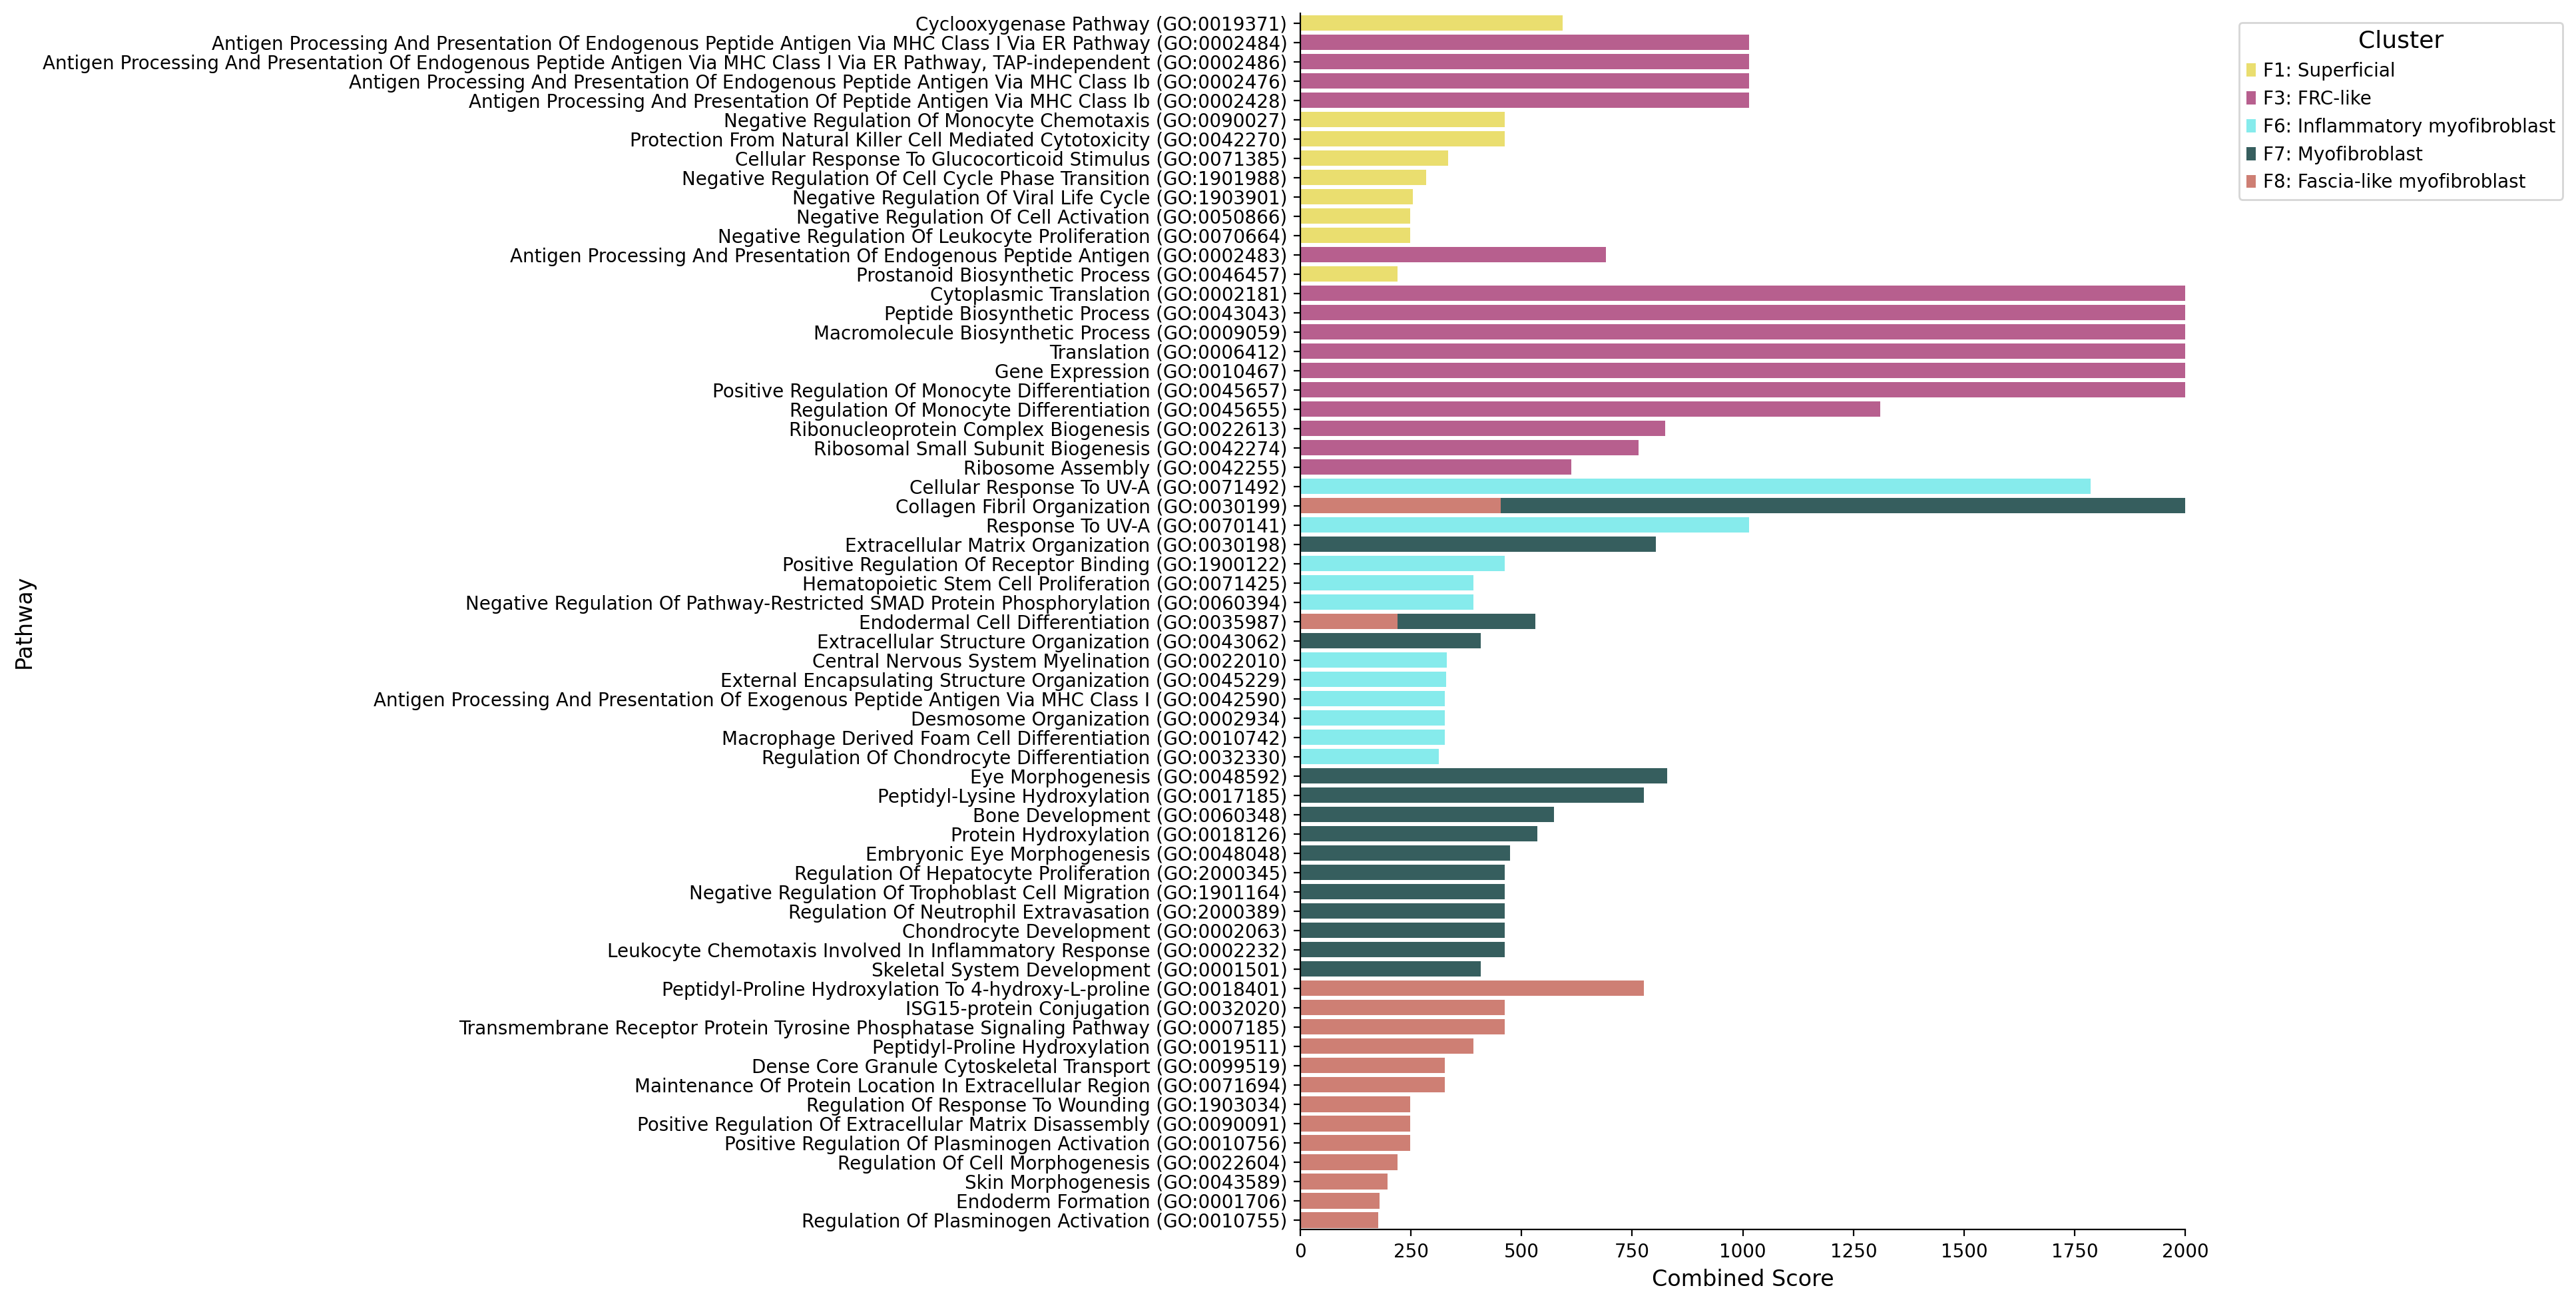

In [23]:


PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(15, PLOTTING_VALUE)).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)

plt.figure(figsize=(20, 10))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(right=2000)  


# Remove the top and right border
sns.despine(top=True, right=True)

# Remove background grid
plt.grid(False)

# Adjust legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
plt.savefig("sfig5/5c_gsea_disease_v2.pdf", dpi=300, bbox_inches="tight", format="pdf")

plt.tight_layout()
plt.show()

/tmp/ipykernel_19046/952513263.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, PLOTTING_VALUE)).reset_index(drop=True)


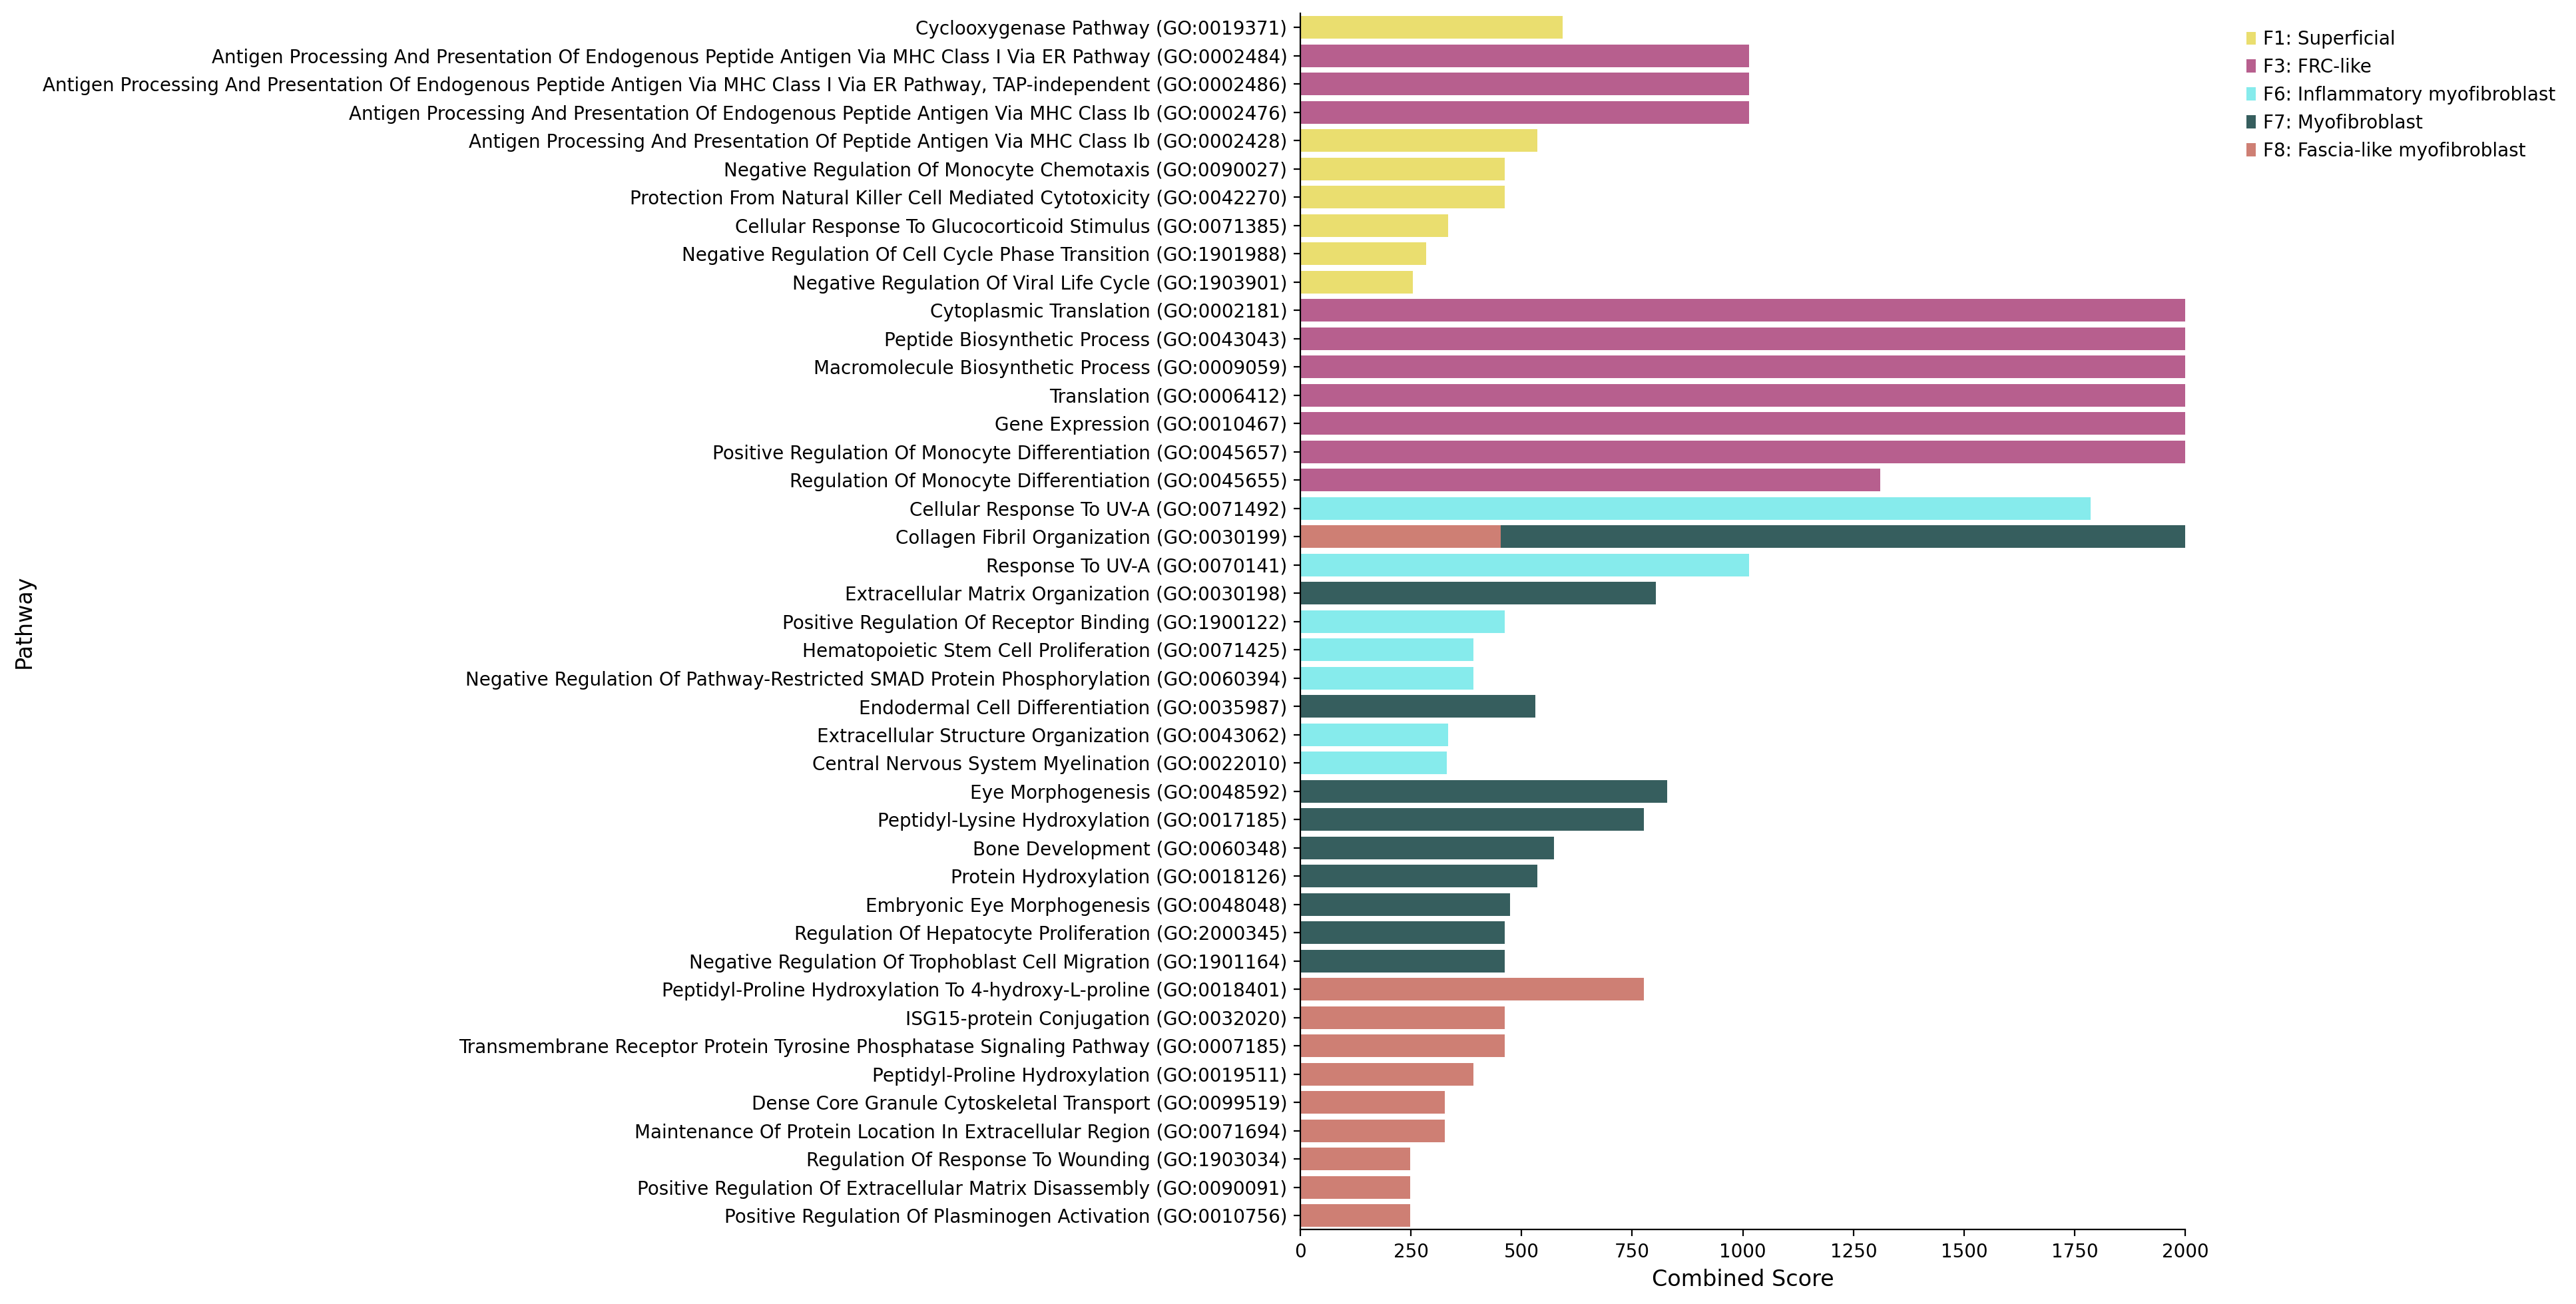

In [24]:
PLOTTING_VALUE = 'Combined Score' 

top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, PLOTTING_VALUE)).reset_index(drop=True)
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])
cluster_colors = top_gsea_df['Cluster'].map(color_palettes)





plt.figure(figsize=(20, 10))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(right=2000)  

# Remove the top and right border
sns.despine(top=True, right=True)

# Remove background grid
plt.grid(False)

# Adjust legend
plt.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left',
    fontsize=10, title=None, frameon=False  # <- Removes title and box
)

plt.tight_layout()

# Save as "sfig5/gsea_disease.pdf"
plt.savefig("sfig5/5c_gsea_disease.pdf", dpi=300, bbox_inches="tight", format="pdf")

plt.show()

# TFs

In [25]:
adata.obs["Site_status"].value_counts()

Site_status
Lesional    177296
PostRx       13460
Name: count, dtype: int64

In [26]:
adata = adata[adata.obs['test13'].str.startswith(( "F6", "F7", "F8"))] #"F1", "F3",

In [27]:
adata.raw = ad.AnnData(adata.layers["counts"].copy(), var=adata.var.copy(), obs=adata.obs.copy())


In [28]:
sc.pp.highly_variable_genes(adata,  
                                n_top_genes=6000, 
                                subset=True,
                                #batch_key="DonorID",
                                check_values=False,
                                #layer="normalized"
                               ) #100
adata.shape

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


(69921, 6000)

In [29]:
net = dc.get_collectri(organism='human', split_complexes=False)
net

source          target  weight  \
0         MYC            TERT       1   
1        SPI1           BGLAP       1   
2       SMAD3             JUN       1   
3       SMAD4             JUN       1   
4      STAT5A             IL2       1   
...       ...             ...     ...   
43173    NFKB  hsa-miR-143-3p       1   
43174     AP1     hsa-miR-206       1   
43175    NFKB   hsa-miR-21-5p       1   
43176    NFKB  hsa-miR-224-5p       1   
43177     AP1     hsa-miR-144       1   

                                                    PMID  
0      10022128;10491298;10606235;10637317;10723141;1...  
1                                               10022617  
2                                      10022869;12374795  
3                                      10022869;12374795  
4      10022878;11435608;17182565;17911616;22854263;2...  
...                                                  ...  
43173                                           19472311  
43174                                           19721712  
43175                                  20813833;22387281  
43176                                  23474441;23988648  
43177                                           23546882  

[43178 rows x 4 columns]

In [30]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)




3842 features of mat are empty, they will be removed.
Running ulm on mat with 69921 samples and 32759 targets for 763 sources.


100%|██████████| 7/7 [00:51<00:00,  7.29s/it]


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


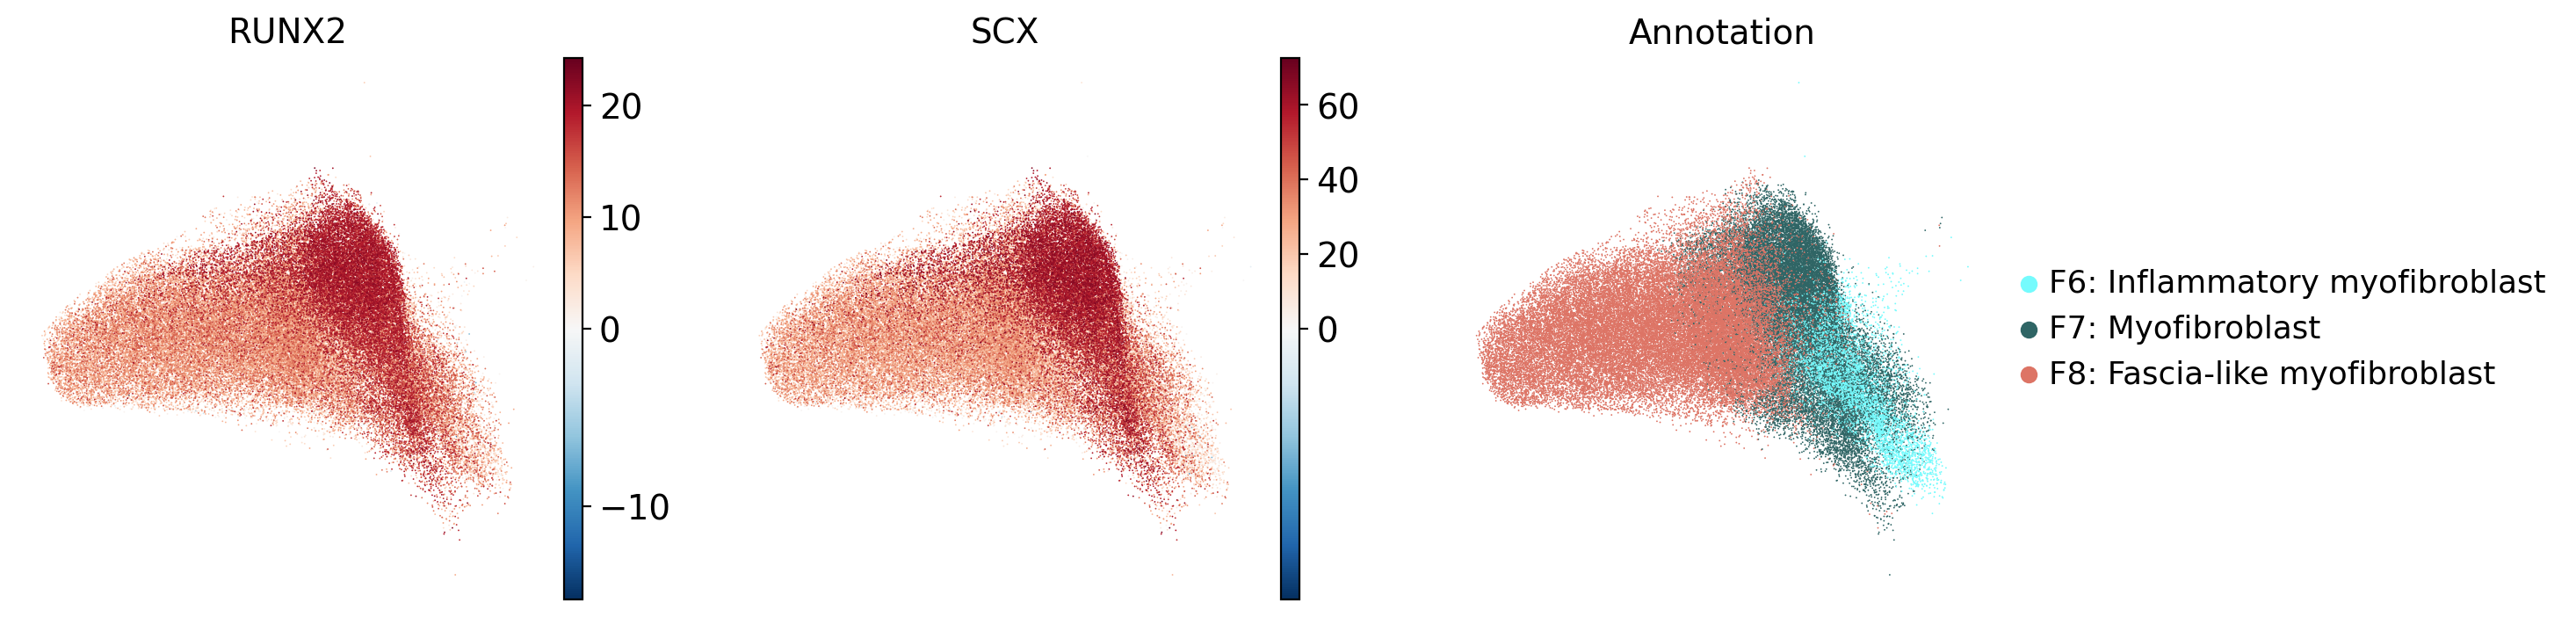

In [31]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts

acts.obs['Annotation']=acts.obs['test13']
acts.obs['Annotation'] = acts.obs['Annotation'].astype('category')   

# Match colors to these categories
acts.uns['Annotation_colors'] = [custom_colors.get(cat, '#808080') for cat in acts.obs['Annotation'].cat.categories]
sc.pl.umap(acts, color=['RUNX2', "SCX", 'Annotation'], cmap='RdBu_r', vcenter=0,
          save="sfig5f.pdf")

In [32]:
sc.logging.print_versions()




-----
anndata     0.10.6
scanpy      1.9.8
-----
PIL                         9.5.0
annotated_types             0.6.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.14.0
backcall                    0.2.0
bottleneck                  1.3.7
certifi                     2023.07.22
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.1.0
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.0
cycler                      0.10.0
cython_runtime              NA
dask                        2024.2.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
decoupler                   1.6.0
defusedxml                  0.7.1
dill                        0.3.8
docrep                      0.3.

# gsea

In [33]:
# adata=adata_lesional
# adata.obs['corefb_names2']=adata.obs['test13']


In [34]:
# sc.tl.rank_genes_groups(adata, 'corefb_names2', method='t-test', key_added="rank_genes_groups");
# df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# df2.head(1)

In [35]:



# result = adata.uns['rank_genes_groups']
# result
# groups = list(df2.columns)
# marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})
# marker_genes
# #groups = ['F1: Superficial_Lesional',
# # 'F1: Superficial_Nonlesional',]
# groups = [x for x in groups if any(x.startswith(prefix) for prefix in ["F6", "F7", "F8", "F1", "F3"])]
# groups
# gsea_results = []

# for cluster in marker_genes.columns:
#     gene_list = marker_genes[cluster].tolist()
#     enr = gp.enrichr(gene_list=gene_list[:500],
#                      gene_sets= 'GO_Biological_Process_2023',  # You can choose other gene sets here
#                      outdir=None,  # Set to None to avoid creating output files
#                      cutoff=0.01  # Cutoff for statistical significance
#                     )
#     enr.results['Cluster'] = cluster
#     gsea_results.append(enr.results)

# gsea_df = pd.concat(gsea_results)
# gsea_df.head(5)
# """
# Reactome_2019 
# 'KEGG_2016',
# 'Reactome_2019',
# 'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
# """

# # gsea_results = []

# # for cluster in marker_genes.columns:
# #     gene_list = marker_genes[cluster].tolist()
# #     enr = gp.enrichr(gene_list=gene_list[:6000],
# #                      gene_sets=  # You can choose other gene sets here
# #                      outdir=None,  # Set to None to avoid creating output files
# #                      cutoff=0.05  # Cutoff for statistical significance
# #                     )
# #     enr.results['Cluster'] = cluster
# #     gsea_results.append(enr.results)

# # gsea_df = pd.concat(gsea_results)
# # gsea_df
# # """

# # Reactome_2019 
# # 'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
# # """


In [36]:

# gsea_df = gsea_df[gsea_df["Cluster"].isin(groups)]
# gsea_df['Cluster'].value_counts()
# color_palettes = {
#   'F1: Superficial' :  '#ffffe5',  # Light Salmon
#    'F1: Superficial_Lesional': '#fece65',  # Dark Orange
#     'F2: Universal': '#d1e2f2',  # Dodger Blue
#     'F2/3: Perivascular': '#7fb8da',  # Deep Sky Blue
#     'F3: FRC-like':  '#fee5d8',  # Tomato Red

#     'F4: DS_DPEP1+':  '#e7f5e5',  # Lime Green
#     'F4: TNN+COCH+':  '#80ca80',  # Medium Sea Green
#     'F4: DP_HHIP+': '#51a46b',  # Sea Green

#     'F5: RAMP1+':  '#9e9ac8',  # Medium Purple
#     'F5: NGFR+':  '#796eb2',  # Steel Blue
#     'F6: Inflammatory myofibroblast': '#05ffff',  # Steel Blue
#     'F6: Myofibroblast':  '#55aaff',  # Steel Blue
#     'F7: Myofibroblast':  '#55aaff',  # Steel Blue

#     'F7: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red
#         'F8: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red

#     'F_Fascia':  '#454545',  # Gray
# }


# PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, PLOTTING_VALUE)).reset_index(drop=True)


# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


# cluster_colors = top_gsea_df['Cluster'].map(color_palettes)


# # plt.figure(figsize=(20, 20))
# # sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)
# # plt.title('', fontsize=14)
# # plt.xlabel(PLOTTING_VALUE, fontsize=12)
# # plt.ylabel('Pathway', fontsize=12)
# # plt.xticks(fontsize=10)
# # plt.yticks(fontsize=10)
# # plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
# # plt.tight_layout()
# # plt.show()










In [37]:


# plt.figure(figsize=(20, 10))
# sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

# plt.title('', fontsize=14)
# plt.xlabel(PLOTTING_VALUE, fontsize=12)
# plt.ylabel('Pathway', fontsize=12)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.xlim(right=2000)  

# # Remove the top and right border
# sns.despine(top=True, right=True)

# # Remove background grid
# plt.grid(False)

# # Adjust legend
# plt.legend(
#     bbox_to_anchor=(1.05, 1), loc='upper left',
#     fontsize=10, title=None, frameon=False  # <- Removes title and box
# )

# plt.tight_layout()

# # Save as "sfig5/gsea_disease.pdf"
# plt.savefig("sfig5/3f_gsea_disease.pdf", dpi=300, bbox_inches="tight", format="pdf")

# plt.show()